In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
customer_data = pd.read_csv("Churn_Modelling.csv")
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargraves,619,France,Female,42,2,0,1,1,1,101349,1
1,2,15647311,Hill,608,Spain,Female,41,1,83808,1,0,1,112543,0
2,3,15619304,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93827,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084,0


0    7963
1    2037
Name: Exited, dtype: int64

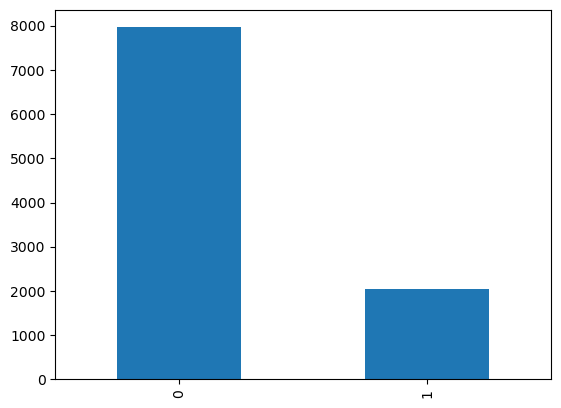

In [3]:
customer_data['Exited'].value_counts().plot(kind="bar")
customer_data.Exited.value_counts()

In [4]:
dataset = customer_data.drop(["RowNumber","Surname","CustomerId"], axis=1)

In [5]:
#Train with imbalance data
dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

model = LogisticRegression() 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [6]:
#OverSampling (Random OverSampling)
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.66      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000



In [7]:
#OverSampling (SMOTE)
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.60      0.61      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [8]:
#UnderSampling (Random UnderSampling)
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

rus = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1607
           1       0.46      0.75      0.57       393

    accuracy                           0.78      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.78      0.80      2000



In [9]:
#UnderSampling (Tomek Links)
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

tl = TomekLinks()
X_train_resampled, y_train_resampled = tl.fit_resample(X_train, y_train)

model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [10]:
#HydridSampling (SMOTE and Tomek Links)
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

smote_tomek = SMOTETomek(random_state=0)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.62      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.85      0.84      0.85      2000



In [11]:
#Cost-sensitive Algorithm (RandomForest)
from sklearn.ensemble import RandomForestClassifier

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

class_weights = {0: 0.8, 1: 0.2}

model = RandomForestClassifier(class_weight=class_weights)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [12]:
#Cost-sensitive Algorithm (LogisticRegression)
from sklearn.linear_model import LogisticRegression

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



In [13]:
#ProbabilityTuning Algorithm (IsotonicRegression)
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

model = RandomForestClassifier()
model.fit(X_train, y_train)

calibrated_model = CalibratedClassifierCV(model, method='isotonic')
calibrated_model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

